In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
X = X.loc[:,['petal length (cm)','petal width (cm)']]

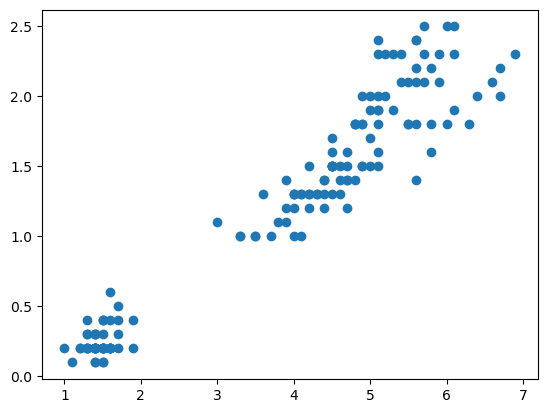

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'])
plt.show()

In [6]:
from sklearn.cluster  import KMeans

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
kmeans.inertia_

86.39021984551395

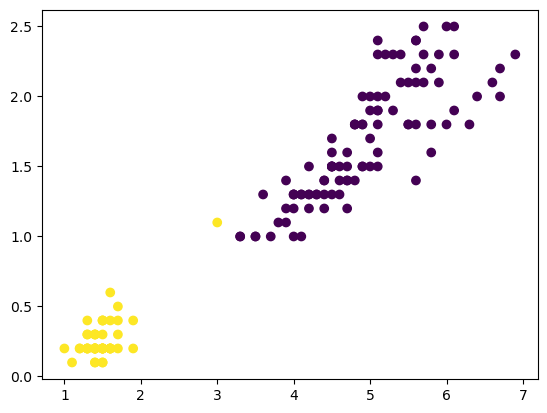

In [10]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans.labels_ )
plt.show()


In [11]:
import numpy as np


In [12]:
centroids = kmeans.cluster_centers_
u_label = np.unique(kmeans.labels_)

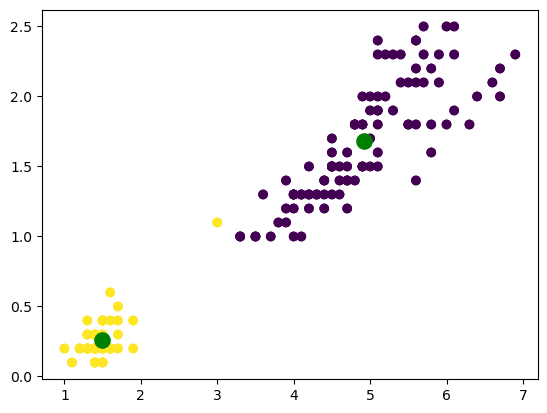

In [13]:
for i in u_label:
   plt.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans.labels_ )
plt.scatter(centroids[:,0], centroids[:,1],s=120,color='g')
plt.show()

In [14]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

In [15]:
kmeans3.inertia_

31.371358974358973

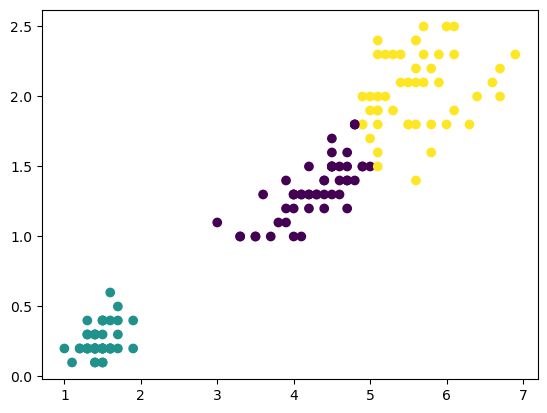

In [16]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans3.labels_ )
plt.show()

In [17]:
centroids = kmeans3.cluster_centers_
u_label = np.unique(kmeans3.labels_)

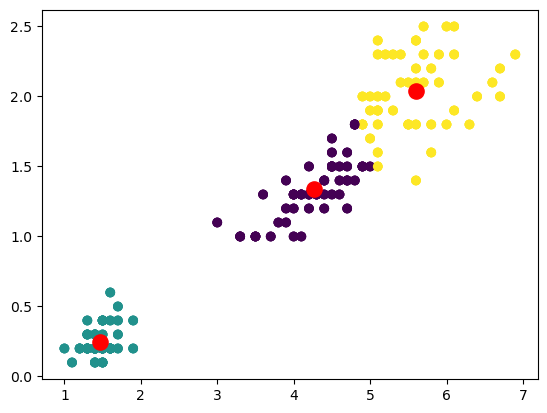

In [18]:
for i in u_label:
   plt.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans3.labels_ )
plt.scatter(centroids[:,0], centroids[:,1],s=120,color='r')
plt.show()

In [19]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)

In [20]:
kmeans4.inertia_

19.477123363965468

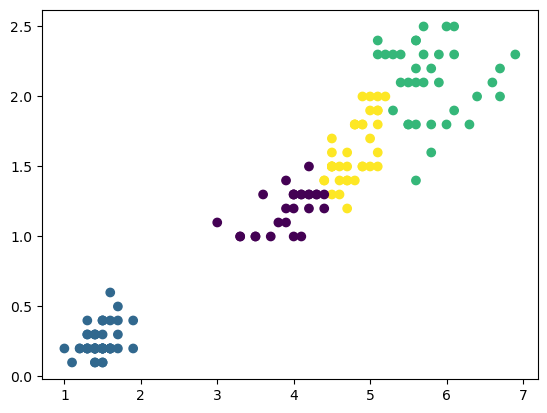

In [21]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans4.labels_ )
plt.show()

In [22]:
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X)

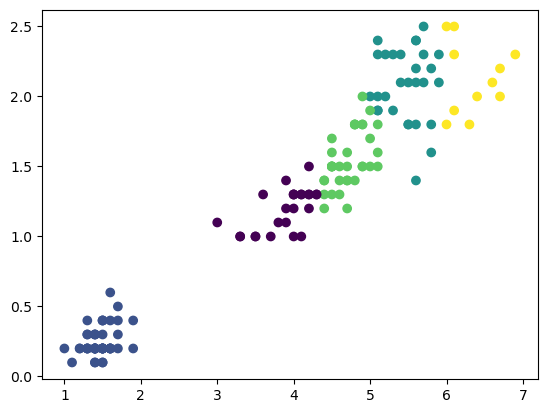

In [23]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans5.labels_ )
plt.show()

In [24]:
kmeans6 = KMeans(n_clusters=6, random_state=0).fit(X)

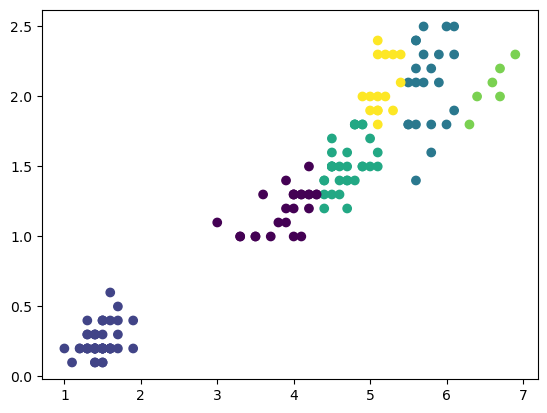

In [25]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans6.labels_ )
plt.show()

In [26]:
kmeans20 = KMeans(n_clusters=20, random_state=0).fit(X)

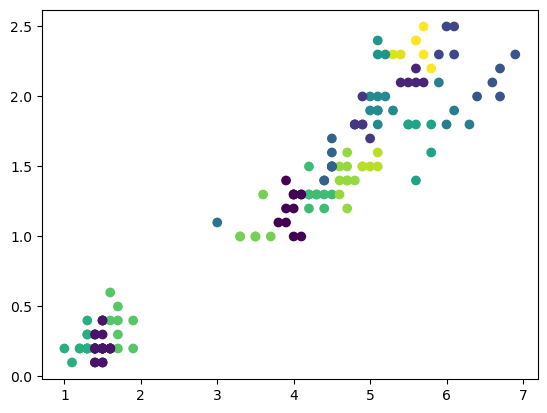

In [27]:
fix,ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans20.labels_ )
plt.show()

In [28]:
valores_k = []
inercias= []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

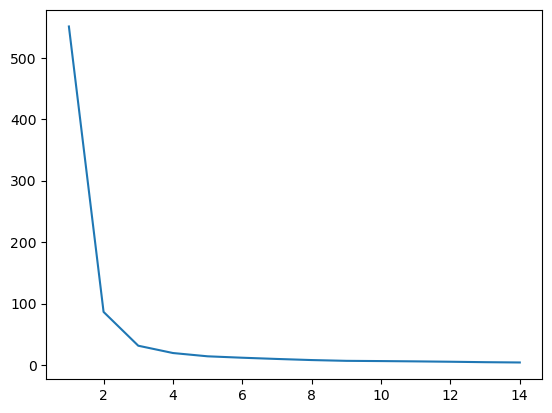

In [29]:
fig, ax= plt.subplots()
ax.plot(valores_k,inercias)
plt.show()

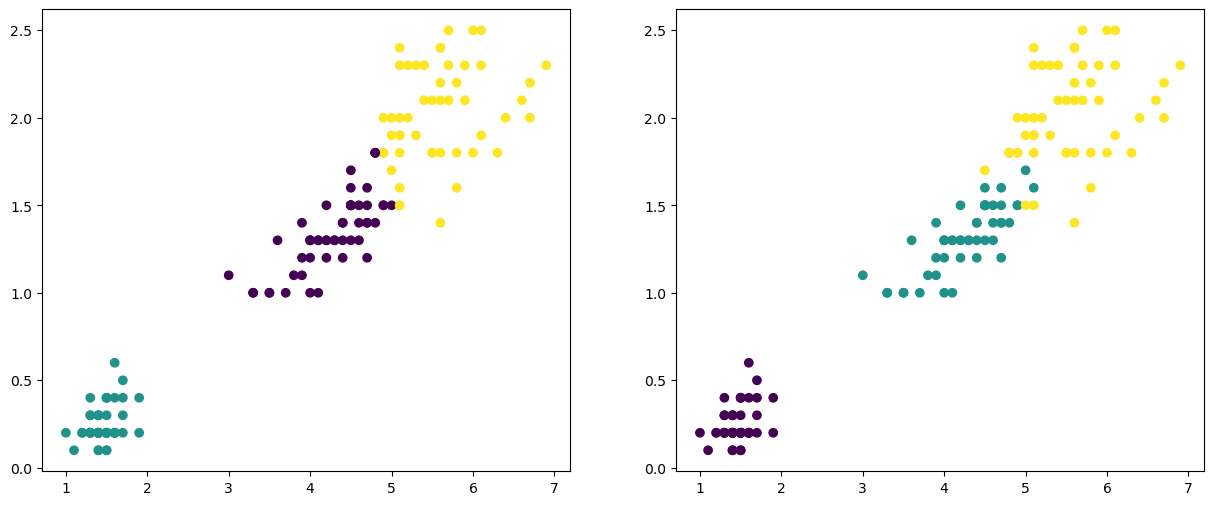

In [30]:
fig,ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans3.labels_ )
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'],c=y )
plt.show()

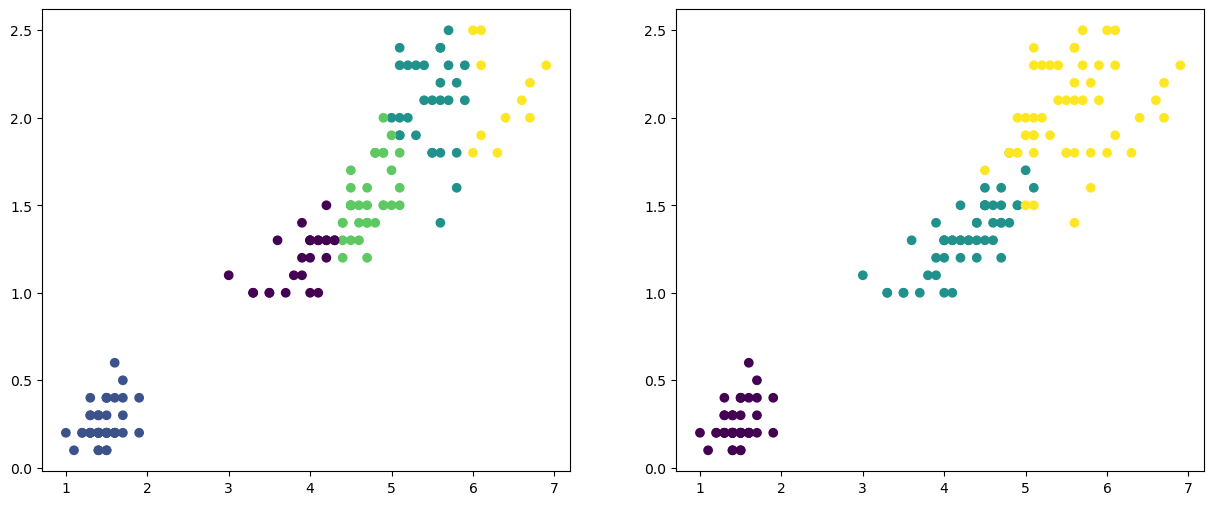

In [31]:
fig,ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'],c=kmeans5.labels_ )
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'],c=y )
plt.show()

- **Índice Rand**
    - https://scikit-learn.org/stable/modules/clustering.html#rand-index
    - mede a semelhança de classe entre 2 pontos
    - **Depende de termos os rótulos / labels**
    - A [fórmula é dada por](https://en.wikipedia.org/wiki/Rand_index): 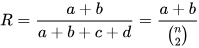
    - Onde:
        - a: número de pares que pertencem **a mesma classe e ao mesmo cluster**
        - b: número de pares que pertencem **a classes diferentes e a clusters diferentes**
        - c: número de pares que pertencem **a mesma classe e a clusters diferentes**
        - d: número de pares que pertencem **a classes diferentes e ao mesmo cluster**<br><br>
    - O Índice Rand tem alguns problemas como ter valores altos mesmo para dados aleatórios e aumentar a medida que aumentamos o número de grupos. Para resolver utilizamos o **Índice Rand Ajustado**, onde:
        - Para uma clusterização aleatória, seu valor é 0
        - O máximo é 1
        - Valores negativos representam clusterizações piores que escolher de forma aleatória os clusters

In [35]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)


In [36]:
from sklearn import metrics
metrics.adjusted_rand_score(y,kmeans2.labels_)

0.5583714437541352

In [37]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)


In [38]:
metrics.adjusted_rand_score(y,kmeans3.labels_)

0.8856970310281228

In [40]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)


In [41]:
metrics.adjusted_rand_score(y,kmeans4.labels_)

0.6799548800041489

In [42]:
# Podemos percorrer os valores de k calculando esses dois indicadores
valores_k = []
ARI = []
RI = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    valores_k.append(i)
    RI.append(metrics.rand_score(y,kmeans.labels_)) 
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_)) 

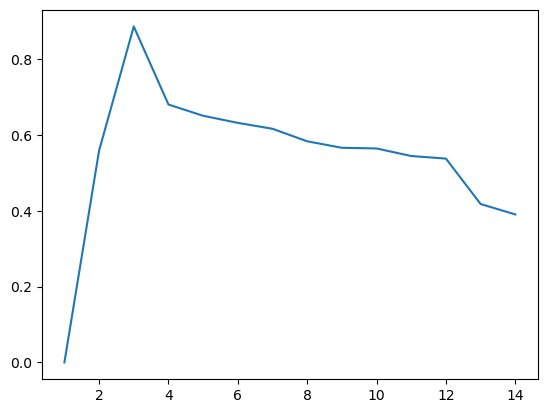

In [44]:
fig, ax = plt.subplots()

ax.plot(valores_k,ARI)

plt.show()

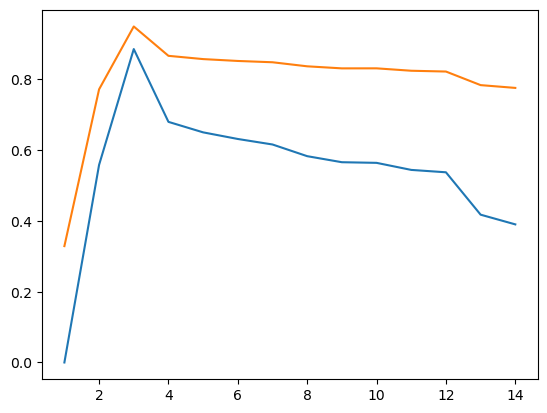

In [45]:
fig, ax = plt.subplots()

ax.plot(valores_k,ARI)
ax.plot(valores_k,RI)

plt.show()

- **"Coeficiente Silhueta"**
    - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
    - Quanto maior esse coeficiente, mais bem definidos são os clusters do modelo
    - Vamos considerar 2 pontuações
        - **a:** A distância média **entre uma amostra e todos os outros pontos da mesma classe**
        - **b:** A distância média **entre uma amostra e todos os outros pontos no outro cluster mais próximo**
    - **Ele avalia tanto a distância intracluster (o quanto os pontos estão afastados dentro do próprio cluster) quando a distância interclusters (o quanto os clusters estão afastados entre si)**
    - O [coeficiente para uma amostra é dado pela fórmula abaixo](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)
   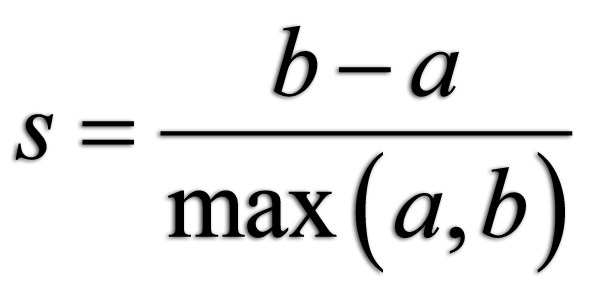!
    - O coeficiente para o conjunto de amostras é dado utilizando a média desse coeficiente para cada amostra

In [47]:
metrics.silhouette_score(X,kmeans2.labels_)

np.float64(0.7653904101383077)

In [48]:
metrics.silhouette_score(X,kmeans3.labels_)

np.float64(0.660480008502266)

In [49]:
valores_k = []
s = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    valores_k.append(i)
    s.append(metrics.silhouette_score(X,kmeans.labels_)) 

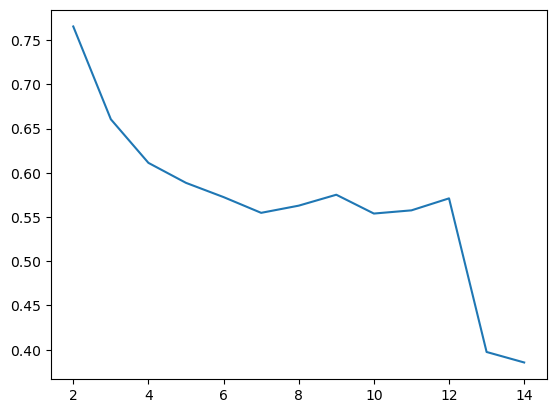

In [50]:
fig, ax = plt.subplots()

ax.plot(valores_k,s)

plt.show()

In [53]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Gerando o dataset make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

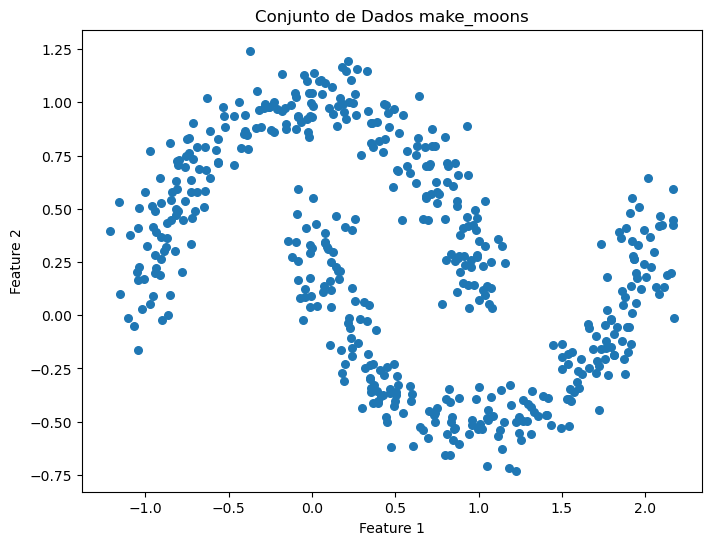

In [54]:
# Visualizando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Conjunto de Dados make_moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


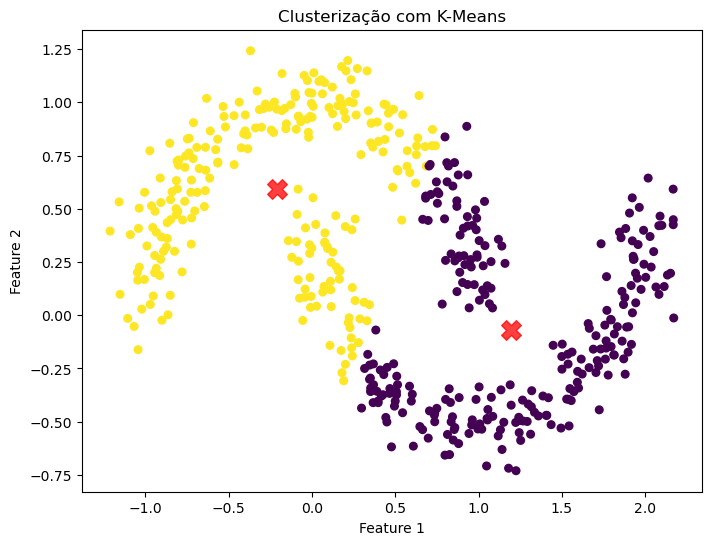

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusterização com K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [62]:
n_samples = 300
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Transformando os dados em formato esférico
X_spherical = np.array([np.cos(X_moons[:, 0]) * np.cos(X_moons[:, 1]),
                        np.cos(X_moons[:, 0]) * np.sin(X_moons[:, 1]),
                        np.sin(X_moons[:, 0])]).T



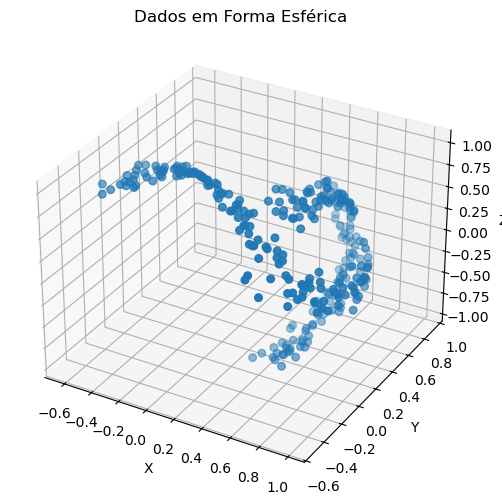

In [63]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_spherical[:, 0], X_spherical[:, 1], X_spherical[:, 2], s=30)
ax.set_title('Dados em Forma Esférica')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [64]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_spherical)
y_kmeans = kmeans.predict(X_spherical)

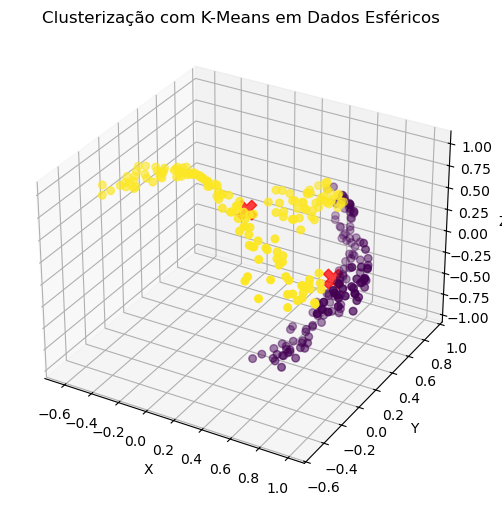

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_spherical[:, 0], X_spherical[:, 1], X_spherical[:, 2], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
ax.set_title('Clusterização com K-Means em Dados Esféricos')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [67]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


In [70]:
import mglearn
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)



Text(0, 0.5, 'Feature 1')

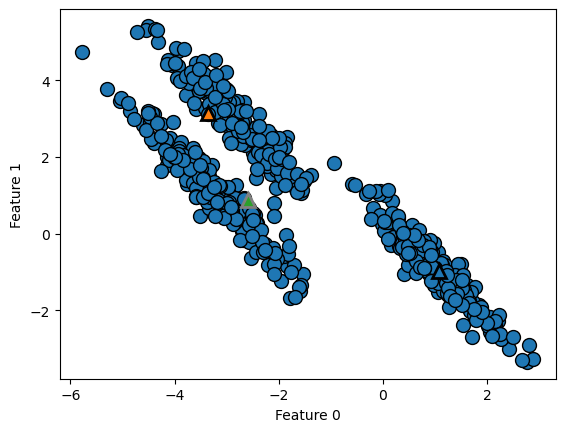

In [72]:
# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

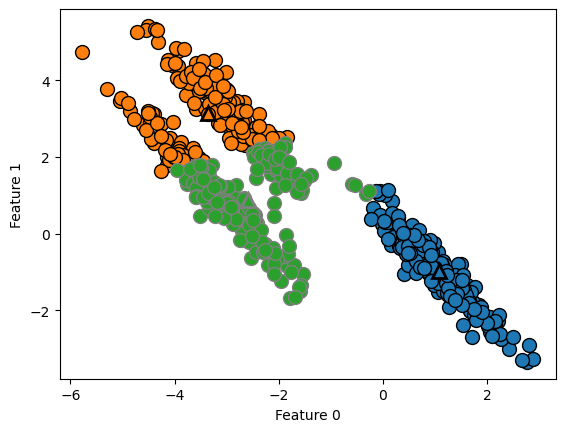

In [71]:
# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")